<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/experimental/Copy_of_Advance_Decline_Nifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# Plotting graphs
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator

In [2]:
import datetime
# Import libraries
import os
import sys
import requests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report

In [3]:
!pip install yfinance --upgrade --no-cache-dir
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 6.3 MB 10.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=135a42fe5e8ec780a32e378f3fb495c8e2910a0474ee84123f85ca6c7f71e5f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-8_wdrtxj/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
nifty10= ['HDFCBANK.NS' ,'RELIANCE.NS' ,'HDFC.NS' ,'INFY.NS' ,'ICICIBANK.NS' ,'TCS.NS' ,'ITC.NS' ,'KOTAKBANK.NS' ,'LT.NS' , 'AXISBANK.NS']

In [5]:
nifty20=['NESTLEIND.NS','MARUTI.NS','GAIL.NS','TATASTEEL.NS','TITAN.NS','BHARTIARTL.NS','BAJAJFINSV.NS','NTPC.NS','BRITANNIA.NS','COALINDIA.NS','HINDALCO.NS','INDUSINDBK.NS','ONGC.NS','ULTRACEMCO.NS','HEROMOTOCO.NS','TECHM.NS','BAJFINANCE.NS','ZEEL.NS','WIPRO.NS','BAJAJ-AUTO.NS','SHREECEM.NS','CIPLA.NS','GRASIM.NS','M&M.NS','SBIN.NS']

In [6]:
nifty100='ongc.ns,indigo.ns,tcs.ns,\
tatamotors.ns,hdfcbank.ns,ofss.ns,\
wipro.ns,infy.ns,hindzinc.ns,\
nestleind.ns,adaniports.ns,\
marico.ns,pghh.ns,\
techm.ns,BAJAJ-AUTO.NS,\
HINDUNILVR.NS,HCLTECH.NS,\
HEROMOTOCO.NS,\
RELIANCE.NS,\
BPCL.NS,BRITANNIA.NS,\
POWERGRID.NS,\
TORNTPHARM.NS,\
COLPAL.NS,\
BHARTIARTL.NS,ICICIGI.NS,ITC.NS,IOC.NS,\
AXISBANK.NS,DRREDDY.NS,HDFCLIFE.NS,\
TATASTEEL.NS,UPL.NS,ABBOTINDIA.NS,\
HDFC.NS,SBILIFE.NS,DMART.NS,\
GODREJCP.NS,\
UBL.NS,\
ASIANPAINT.NS,\
DABUR.NS,\
PIDILITIND.NS,\
TITAN.NS,\
COALINDIA.NS,\
GAIL.NS,\
PETRONET.NS,HDFCAMC.NS,HAVELLS.NS,\
ICICIBANK.NS,MARUTI.NS,BAJAJHLDNG.NS,NAUKRI.NS,\
HINDPETRO.NS,LT.NS,GRASIM.NS,\
CONCOR.NS,JSWSTEEL.NS,M&M.NS,\
ULTRACEMCO.NS,BIOCON.NS,IGL.NS,PFC.NS,\
HINDALCO.NS,CADILAHC.NS,KOTAKBANK.NS,\
BANDHANBNK.NS,NHPC.NS,\
DIVISLAB.NS,\
CIPLA.NS,\
BERGEPAINT.NS,\
ZEEL.NS,\
SHREECEM.NS,\
BAJFINANCE.NS,\
LUPIN.NS,\
SIEMENS.NS,BANKBARODA.NS,\
NTPC.NS,GICRE.NS,MUTHOOTFIN.NS,ACC.NS,INDUSINDBK.NS,\
AMBUJACEM.NS,BAJAJFINSV.NS,PNB.NS,EICHERMOT.NS,PAGEIND.NS,\
SBIN.NS,MOTHERSUMI.NS,ICICIPRULI.NS,SUNPHARMA.NS,MCDOWELL-N.NS,\
AUROPHARMA.NS,\
ADANITRANS.NS,BOSCHLTD.NS,\
DLF.NS,SRTRANSFIN.NS,PEL.NS,NMDC.NS'
nifty100 = nifty100.split(',')
# ,infratel.ns

In [7]:
START = "2016-01-01"  #yyyy-mm-dd
END= '2019-05-01'
START_testdate='2019-08-01'
lst= []

In [8]:
nifty= yf.download('^NSEI', start=START,end=END)

[*********************100%***********************]  1 of 1 completed


In [9]:
#set.intersection(set(nifty20),set(nifty10))

In [10]:
for i in range(len(nifty100)):
  dfi = yf.download(nifty100[i], start=START,end=END)
  dfi = dfi.dropna()
  dfi = dfi.iloc[:,:4]
  lst.append(dfi)

#df1.head(3)
print('\n All Completed \n')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [11]:
nlst=[]
for i in range(len(nifty100)):
  nlst.append(lst[i].Close)

In [12]:
df = pd.DataFrame(nlst).T

In [13]:
namelist =[]
for i in range(1 , len(nifty100)+1):
  namelist.append('Close'+str(i))

In [14]:
df.columns=namelist


In [15]:
data_copy=df.copy()


In [16]:
namelist =[]
for i in range(1 , len(nifty100)+1):
  namelist.append('Close'+str(i))

In [17]:
df.columns=namelist

In [18]:
data_copy=df.copy()

In [19]:
df.head()

,Close1,Close2,Close3,Close4,Close5,Close6,Close7,Close8,Close9,Close10,Close11,Close12,Close13,Close14,Close15,Close16,Close17,Close18,Close19,Close20,Close21,Close22,Close23,Close24,Close25,Close26,Close27,Close28,Close29,Close30,Close31,Close32,Close33,Close34,Close35,Close36,Close37,Close38,Close39,Close40,...,Close59,Close60,Close61,Close62,Close63,Close64,Close65,Close66,Close67,Close68,Close69,Close70,Close71,Close72,Close73,Close74,Close75,Close76,Close77,Close78,Close79,Close80,Close81,Close82,Close83,Close84,Close85,Close86,Close87,Close88,Close89,Close90,Close91,Close92,Close93,Close94,Close95,Close96,Close97,Close98
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,161.666672,1343.449951,1208.199951,401.899994,544.375000,3801.750000,208.668808,552.625000,149.149994,5785.149902,267.549988,227.149994,5603.250000,520.049988,2518.000000,856.549988,422.924988,2686.050049,502.907928,298.683319,1493.199951,105.750023,1478.900024,976.750000,312.639740,NaN,218.333328,108.312500,449.899994,3108.600098,NaN,245.234406,293.566681,5895.950195,1258.449951,NaN,NaN,447.350006,943.700012,878.750000,...,2824.000000,86.866669,105.389999,101.250000,84.900002,332.700012,727.250000,NaN,21.200001,1162.500000,655.349976,186.571426,432.899994,11383.549805,609.585022,1845.250000,1202.650024,159.050003,120.416664,NaN,178.750000,1373.650024,963.849976,205.649994,1983.800049,117.599998,1737.084961,13510.349609,227.800003,132.000000,NaN,815.549988,602.099976,881.400024,41.049999,19199.099609,121.550003,865.700012,980.159790,91.250000
2016-01-04,158.699997,1262.099976,1184.800049,377.049988,535.250000,3746.399902,209.137558,539.450012,145.050003,5669.799805,257.950012,225.300003,5600.000000,516.400024,2483.350098,859.000000,422.975006,2637.800049,492.977081,297.149994,1486.300049,105.712524,1448.349976,974.299988,300.060699,NaN,216.733337,106.612503,438.399994,3056.000000,NaN,244.758041,289.233337,5930.899902,1216.699951,NaN,NaN,443.250000,939.950012,880.799988,...,2749.149902,89.033333,103.849998,98.175003,80.750000,320.799988,705.299988,NaN,21.500000,1149.699951,645.650024,188.178574,421.950012,11059.299805,605.244995,1795.150024,1190.250000,151.199997,119.416664,NaN,178.350006,1344.000000,934.200012,202.149994,1959.500000,112.800003,1749.530029,13558.049805,220.699997,127.088890,NaN,799.099976,595.489990,844.299988,38.650002,18815.650391,118.400002,840.900024,959.974304,89.949997
2016-01-05,161.233337,1252.949951,1174.474976,374.450012,531.200012,3739.449951,208.837555,537.025024,151.250000,5662.399902,255.699997,229.649994,5523.649902,521.900024,2502.350098,847.950012,421.399994,2616.850098,497.855835,300.883331,1483.349976,104.362526,1435.949951,974.250000,296.984802,NaN,216.566666,110.662498,436.450012,3070.649902,NaN,261.335663,290.200012,5878.100098,1209.400024,NaN,NaN,438.633331,950.099976,900.650024,...,2733.050049,89.025002,111.290001,100.849998,82.599998,313.600006,707.750000,NaN,22.000000,1147.500000,640.849976,183.892853,425.049988,11124.299805,599.784973,1783.050049,1195.800049,148.100006,118.541664,NaN,177.449997,1341.300049,935.250000,204.000000,1946.000000,110.599998,1715.989990,13828.549805,217.750000,128.688889,NaN,800.500000,589.000000,863.500000,38.799999,18632.699219,118.400002,864.900024,956.626221,93.250000
2016-01-06,158.366669,1235.400024,1190.800049,365.899994,533.549988,3737.250000,208.162552,534.674988,145.699997,5719.500000,251.800003,226.850006,5640.149902,525.099976,2485.500000,843.049988,420.700012,2578.199951,511.253815,304.100006,1500.849976,104.625023,1442.849976,949.450012,295.837067,NaN,210.066666,112.712502,430.700012,3046.250000,NaN,256.047974,295.566681,5783.600098,1209.300049,NaN,NaN,435.383331,941.849976,886.400024,...,2735.300049,87.291664,113.540001,100.349998,80.550003,320.750000,703.599976,NaN,21.850000,1137.199951,652.099976,181.178574,423.149994,11452.349609,610.724976,1753.199951,1205.300049,148.699997,117.875000,NaN,177.199997,1320.349976,943.950012

In [20]:
df['diff1'] = (df['Close1'].diff() > 0 ).astype(int) + (df['Close2'].diff() >0).astype(int)+ (df['Close3'].diff()>0).astype(int)+(df['Close4'].diff()>0).astype(int) + (df['Close5'].diff()>0).astype(int)+ (df['Close6'].diff()>0).astype(int)+ (df['Close7'].diff()>0).astype(int)+(df['Close8'].diff()>0).astype(int)+ (df['Close9'].diff()>0).astype(int)+ (df['Close10'].diff()>0).astype(int)

In [21]:
df['diff2'] = (df['Close11'].diff() > 0 ).astype(int) + (df['Close12'].diff() >0).astype(int)+ (df['Close13'].diff()>0).astype(int)+(df['Close14'].diff()>0).astype(int) + (df['Close15'].diff()>0).astype(int)+ (df['Close16'].diff()>0).astype(int)+ (df['Close17'].diff()>0).astype(int)+(df['Close18'].diff()>0).astype(int)+ (df['Close19'].diff()>0).astype(int)+ (df['Close20'].diff()>0).astype(int)

In [22]:
df['diff3'] = (df['Close21'].diff() > 0 ).astype(int) + (df['Close22'].diff() >0).astype(int)+ (df['Close23'].diff()>0).astype(int)+(df['Close24'].diff()>0).astype(int) + (df['Close25'].diff()>0).astype(int)+ (df['Close26'].diff()>0).astype(int)+ (df['Close27'].diff()>0).astype(int)+(df['Close28'].diff()>0).astype(int)+ (df['Close29'].diff()>0).astype(int)+ (df['Close30'].diff()>0).astype(int)

In [23]:
df['diff4'] = (df['Close31'].diff() > 0 ).astype(int) + (df['Close32'].diff() >0).astype(int)+ (df['Close33'].diff()>0).astype(int)+(df['Close34'].diff()>0).astype(int) + (df['Close35'].diff()>0).astype(int)

In [24]:
df['diff5'] = (df['Close36'].diff() > 0 ).astype(int) + (df['Close37'].diff() >0).astype(int)+ (df['Close38'].diff()>0).astype(int)+(df['Close39'].diff()>0).astype(int) + (df['Close40'].diff()>0).astype(int)+\
              (df['Close41'].diff() > 0 ).astype(int) + (df['Close42'].diff() >0).astype(int)+ (df['Close43'].diff()>0).astype(int)+(df['Close44'].diff()>0).astype(int) + (df['Close45'].diff()>0).astype(int)+\
              (df['Close46'].diff() > 0 ).astype(int) + (df['Close47'].diff() >0).astype(int)+ (df['Close48'].diff()>0).astype(int)+(df['Close49'].diff()>0).astype(int) + (df['Close50'].diff()>0).astype(int)+\
              (df['Close51'].diff() > 0 ).astype(int) + (df['Close52'].diff() >0).astype(int)+ (df['Close53'].diff()>0).astype(int)+(df['Close54'].diff()>0).astype(int) + (df['Close55'].diff()>0).astype(int)+\
              (df['Close56'].diff() > 0 ).astype(int) + (df['Close57'].diff() >0).astype(int)+ (df['Close58'].diff()>0).astype(int)+(df['Close59'].diff()>0).astype(int) + (df['Close60'].diff()>0).astype(int)+\
              (df['Close61'].diff() > 0 ).astype(int) + (df['Close62'].diff() >0).astype(int)+ (df['Close63'].diff()>0).astype(int)+(df['Close64'].diff()>0).astype(int) + (df['Close65'].diff()>0).astype(int)+\
              (df['Close66'].diff() > 0 ).astype(int) + (df['Close67'].diff() >0).astype(int)+ (df['Close68'].diff()>0).astype(int)+(df['Close69'].diff()>0).astype(int) + (df['Close70'].diff()>0).astype(int)+\
              (df['Close71'].diff() > 0 ).astype(int) + (df['Close72'].diff() >0).astype(int)+ (df['Close73'].diff()>0).astype(int)+(df['Close74'].diff()>0).astype(int) + (df['Close75'].diff()>0).astype(int)+\
              (df['Close76'].diff() > 0 ).astype(int) + (df['Close77'].diff() >0).astype(int)+ (df['Close78'].diff()>0).astype(int)+(df['Close79'].diff()>0).astype(int) + (df['Close80'].diff()>0).astype(int)+\
              (df['Close81'].diff() > 0 ).astype(int) + (df['Close82'].diff() >0).astype(int)+ (df['Close83'].diff()>0).astype(int)+(df['Close84'].diff()>0).astype(int) + (df['Close85'].diff()>0).astype(int)+\
              (df['Close86'].diff() > 0 ).astype(int) + (df['Close87'].diff() >0).astype(int)+ (df['Close88'].diff()>0).astype(int)+(df['Close89'].diff()>0).astype(int) + (df['Close90'].diff()>0).astype(int)+\
              (df['Close91'].diff() > 0 ).astype(int) + (df['Close92'].diff() >0).astype(int)+ (df['Close93'].diff()>0).astype(int)+(df['Close94'].diff()>0).astype(int) + (df['Close95'].diff()>0).astype(int)+\
              (df['Close96'].diff()>0).astype(int) + (df['Close97'].diff()>0).astype(int)+(df['Close98'].diff()>0).astype(int)

In [25]:
df['diff']=df['diff1'].astype(int) + df['diff2'].astype(int) +df['diff3'].astype(int) +df['diff4'].astype(int)+df['diff5'].astype(int)

In [26]:
df['diff'].max()

90

In [27]:
import datetime
start_date = '2017-01-01'
end_date = str(datetime.datetime.today()).split()[0]
datetime.date.today()
end_date

'2021-11-03'

In [28]:
df['ema10AD']=df['diff'].ewm(span=10, adjust=False).mean()
df['ema15AD']=df['diff'].ewm(span=15, adjust=False).mean()
df['ema20AD']=df['diff'].ewm(span=20, adjust=False).mean()
df['ema25AD']=df['diff'].ewm(span=25, adjust=False).mean()
df['smooth_ema20']=df['ema20AD'].ewm(span=5, adjust=False).mean()
df['smooth_ema25']=df['ema25AD'].ewm(span=10, adjust=False).mean()
df['ema30AD']=df['diff'].ewm(span=30, adjust=False).mean()
df['ema35AD']=df['diff'].ewm(span=35, adjust=False).mean()
df['ema40AD']=df['diff'].ewm(span=40, adjust=False).mean()
df['ema50AD']=df['diff'].ewm(span=50, adjust=False).mean()
df['ema100AD']=df['diff'].ewm(span=100, adjust=False).mean()
df['smooth_ema50']=df['ema50AD'].ewm(span=5, adjust=False).mean()
df['smooth_ema100']=df['ema100AD'].ewm(span=10, adjust=False).mean()

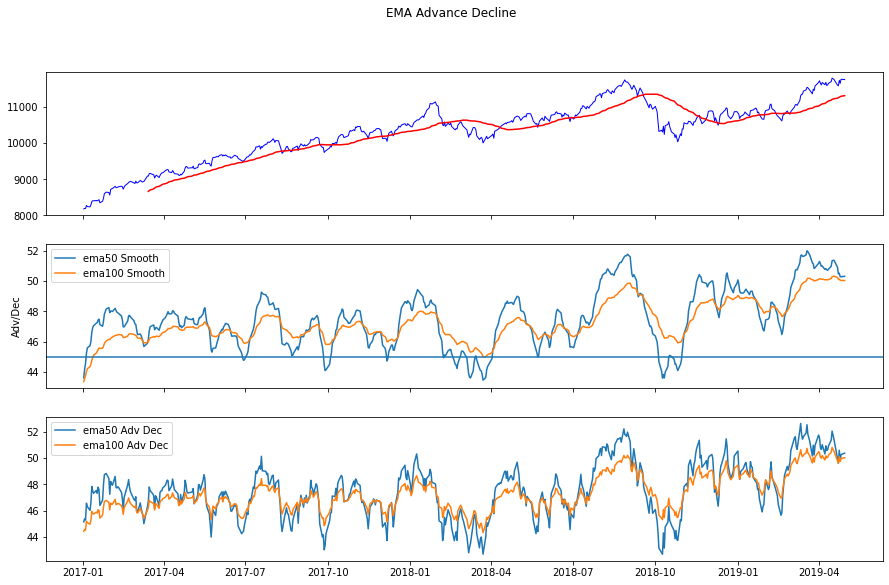

In [29]:
fig, ax = plt.subplots(3,1,figsize=(15,9),sharex=True)
ax[0].plot(nifty.loc[start_date:end_date, :].index, nifty.loc[start_date:end_date, 'Close'],'b-', linewidth=1, markersize=3, label='Price Low')
ax[0].plot(nifty.loc[start_date:end_date, :].index, nifty.loc[start_date:end_date, 'Close'].rolling(window=50).mean(),'r')
#ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ema10Low'], label='ema10Low')
ax[1].plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'smooth_ema50'], label='ema50 Smooth')
ax[1].plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'smooth_ema100'], label='ema100 Smooth')
ax[2].plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ema50AD'], label='ema50 Adv Dec')
ax[2].plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ema100AD'], label='ema100 Adv Dec')
ax[1].axhline(y=45)
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[1].set_ylabel('Adv/Dec')
fig.suptitle('EMA Advance Decline')
plt.show()

In [30]:
# I Just need the Close
price_data =df.copy()
price_data=pd.concat([price_data,nifty['Close']],axis=1)

In [31]:
features = ['ema10AD','ema15AD','ema20AD','ema25AD','ema30AD','ema35AD','ema40AD','ema50AD','ema100AD','diff','smooth_ema20','smooth_ema25']

# Days Out

In [32]:
# define the number of days out you want to predict
days_out =14

# create a new column that will house the flag, and for each group calculate the diff compared to 30 days ago. Then use Numpy to define the sign.
price_data['Signal_Flag'] = price_data['Close'].transform(lambda x : np.sign(x.diff(days_out)))
#price_data['Signal_Flag_INR'] = price_data['INRClose'].transform(lambda x : np.sign(x.diff(days_out)))
# print the first 50 rows

In [33]:
# Create a column we wish to predict
'''
    In this case, let's create an output column that will be 1 if the closing price at time 't' is greater than 't-1' and 0 otherwise.
    In other words, if the today's closing price is greater than yesterday's closing price it would be 1.
'''

# Group by the `Symbol` column, then grab the `Close` column.
close_groups = price_data['Close']

# Apply the lambda function which will return -1.0 for down, 1.0 for up and 0.0 for no change.
close_groups = close_groups.transform(lambda x : np.sign(x.diff(days_out)))

# add the data to the main dataframe.
price_data['Prediction'] = close_groups

# for simplicity in later sections I'm going to make a change to our prediction column. To keep this as a binary classifier I'll change flat days and consider them up days.
price_data.loc[price_data['Prediction'] == 0.0] = 1.0

# print the head
price_data.tail(3)

,Close1,Close2,Close3,Close4,Close5,Close6,Close7,Close8,Close9,Close10,Close11,Close12,Close13,Close14,Close15,Close16,Close17,Close18,Close19,Close20,Close21,Close22,Close23,Close24,Close25,Close26,Close27,Close28,Close29,Close30,Close31,Close32,Close33,Close34,Close35,Close36,Close37,Close38,Close39,Close40,...,Close81,Close82,Close83,Close84,Close85,Close86,Close87,Close88,Close89,Close90,Close91,Close92,Close93,Close94,Close95,Close96,Close97,Close98,diff1,diff2,diff3,diff4,diff5,diff,ema10AD,ema15AD,ema20AD,ema25AD,smooth_ema20,smooth_ema25,ema30AD,ema35AD,ema40AD,ema50AD,ema100AD,smooth_ema50,smooth_ema100,Close,Signal_Flag,Prediction
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-25,168.850006,1483.650024,2195.000000,221.850006,1131.724976,3529.850098,295.200012,728.549988,272.950012,10846.450195,389.250000,356.450012,10595.500000,816.500000,3088.050049,1734.199951,566.849976,2612.250000,1359.513184,358.250000,2969.250000,143.662537,1728.400024,1200.599976,328.500000,1075.900024,304.149994,152.699997,740.900024,2924.899902,399.100006,510.750000,643.400024,7640.250000,1955.150024,614.349976,1328.050049,650.349976,1450.449951,1447.949951,...,1683.449951,220.550003,7669.500000,86.750000,2034.020020,23101.449219,306.200012,148.149994,367.700012,461.000000,547.650024,795.549988,220.600006,17996.349609,173.600006,1153.099976,2494.143066,100.550003,5,4,3,1,18,31,46.643511,47.746960,48.461077,48.949103,49.473391,50.332458,49.283341,49.510298,49.662395,49.824857,49.739272,50.283520,50.048848,11641.799805,-1.0,-1.0
2019-04-26,168.399994,1481.800049,2238.550049,215.600006,1140.474976,3544.149902,294.799988,738.000000,270.450012,10971.250000,391.750000,358.899994,10228.250000,823.250000,3044.649902,1747.349976,569.875000,2604.000000,1379.721558,371.049988,2967.699951,143.100037,1753.750000,1204.099976,325.450012,1089.150024,304.549988,152.850006,759.900024,2892.250000,399.649994,545.250000,646.900024,7467.500000,1977.400024,637.250000,1301.150024,653.200012,1435.650024,1448.750000,...,1698.849976,226.000000,7721.250000,88.150002,2033.064941,22997.150391,312.500000,144.500000,369.049988,464.100006,547.000000,831.150024,218.199997,18018.599609,174.300003,1135.500000,2346.452637,99.750000,5,7,6,4,39,61,49.253782,49.403590,49.655260,49.876095,49.534014,50.249483,50.039254,50.148614,50.215449,50.263098,49.962257,50.276712,50.033104,11754.650391,1.0,1.0
2019-04-30,169.199997,1517.000000,2260.350098,214.300003,1158.724976,3519.800049,298.549988,751.349976,276.850006,10905.299805,392.799988,359.399994,10203.650391,836.099976,2984.100098,1757.699951,591.674988,2511.850098,1379.721558,379.850006,2896.050049,139.800034,1791.900024,1208.150024,320.299988,1093.349976,301.350006,158.050003,766.849976,2933.750000,404.549988,557.200012,646.099976,7421.350098,1995.050049,639.849976,1295.500000,651.799988,1418.949951,1463.150024,...,1606.500000,220.500000,7520.450195,84.900002,2036.829956,23091.849609,309.950012,146.500000,369.299988,457.649994,561.099976,819.049988,219.050003,18018.949219,172.750000,1110.949951,2305.649902,100.449997,7,6,6,3,31,53,49.934913,49.853141,49.973807,50.116396,49.680612,50.225286,50.230270,50.307025,50.351281,50.370427,50.022410,50.307951,50.031160,11748.150391,1.0,1.0


In [34]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {}  columns in original dataset'.format(price_data.shape[0], price_data.shape[1]))

# Any row that has a `NaN` value will be dropped.
price_data = price_data.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns in original dataset'.format(price_data.shape[0], price_data.shape[1]))

# Print the head.

Before NaN Drop we have 819 rows and 120  columns in original dataset
After NaN Drop we have 174 rows and 120 columns in original dataset


In [35]:

# Number of trees is not a parameter that should be tuned, but just set large enough usually. There is no risk of overfitting in random forest with growing number of # trees, as they are trained independently from each other. 
n_estimators = list(range(200, 2000, 200))

# Number of features to consider at every split
max_features = ['auto', 'sqrt', None, 'log2']

# Maximum number of levels in tree
# Max depth is a parameter that most of the times should be set as high as possible, but possibly better performance can be achieved by setting it lower.
max_depth = list(range(10, 110, 10))
max_depth.append(None)

# Minimum number of samples required to split a node
# Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can also lead to # under-fitting hence depending on the level of underfitting or overfitting, you can tune the values for min_samples_split.
min_samples_split = [2, 5, 10, 20, 30, 40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 7, 12, 14, 16 ,20]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10, 20, 30, 40], 'min_samples_leaf': [1, 2, 7, 12, 14, 16, 20], 'bootstrap': [True, False]}


In [36]:
X_Cols = price_data[features]
Y_Cols = price_data['Prediction']
#,'log5vol','log5','RSI','Price_Rate_Of_Change','log5volM','log5M','MMI_roc'
# Split X and y into X_train and X_test
samp_train= int(len(price_data)*.75) -50
samp_test= samp_train+50
X_train = X_Cols[:samp_train]
X_test = X_Cols[samp_test:]
y_train = Y_Cols[:samp_train]
y_test = Y_Cols[samp_test:]


#X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)


# New Random Forest Classifier to house optimal parameters
rf = RandomForestClassifier()

# Specfiy the details of our Randomized Search
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
'''
# Fit the random search model############################~~~~~~~~~~~~~~~~~~################
rf_random.fit(X_train, y_train)
print(f"Best score: {rf_random.best_score_}")
print("Best parameters set:")
best_parameters = rf_random.best_estimator_.get_params()
for param_name in sorted(random_grid.keys()):
  print(f"\t{param_name}: {best_parameters[param_name]}")
'''

'\n# Fit the random search model############################~~~~~~~~~~~~~~~~~~################\nrf_random.fit(X_train, y_train)\nprint(f"Best score: {rf_random.best_score_}")\nprint("Best parameters set:")\nbest_parameters = rf_random.best_estimator_.get_params()\nfor param_name in sorted(random_grid.keys()):\n  print(f"\t{param_name}: {best_parameters[param_name]}")\n'

In [37]:
rand_frst_clf = RandomForestClassifier(n_estimators = 1600,max_depth=80,min_samples_leaf=16,max_features = 'sqrt',min_samples_split=20, criterion = "gini", bootstrap=True,random_state = 42)

In [38]:
# Fit the data to the model
rand_frst_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_frst_clf.predict(X_test)

# Define the traget names
target_names = ['Down Day', 'Up Day']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Down Day,0.500000,0.111111,0.181818,9.000000
Up Day,0.809524,0.971429,0.883117,35.000000
accuracy,0.795455,0.795455,0.795455,0.795455
macro avg,0.654762,0.541270,0.532468,44.000000
weighted avg,0.746212,0.795455,0.739669,44.000000


Accuracy: 0.7954545454545454
Percision: 0.8095238095238095
Recall: 0.9714285714285714
Specificity: 0.1111111111111111
F1 Score : 0.8831168831168832


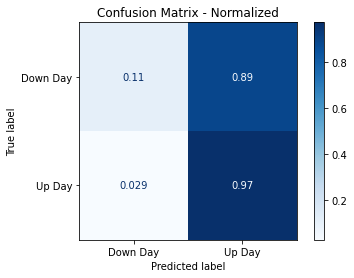

In [39]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))
print('F1 Score : {}' .format(float(2 * (percision * recall) / (percision + recall))))
disp = plot_confusion_matrix(rand_frst_clf, X_test, y_test, display_labels = ['Down Day', 'Up Day'], normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()

In [40]:
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
feature_imp

ema25AD         0.195514
smooth_ema20    0.166948
ema35AD         0.151104
ema30AD         0.145580
ema20AD         0.113589
ema40AD         0.095718
smooth_ema25    0.044488
ema50AD         0.042592
ema15AD         0.031955
ema100AD        0.008107
ema10AD         0.004386
diff            0.000018
dtype: float64

#Test Series

In [41]:
Ticker = '^NSEI'
nifty_n = yf.download(Ticker, start=START_testdate)
nifty_n=nifty_n.dropna()
nifty_n=nifty_n.iloc[:,:4]

[*********************100%***********************]  1 of 1 completed


In [42]:
lst_t=[]
for i in range(len(nifty100)):
  df_t =  yf.download(nifty100[i], start=START_testdate)
  df_t = df_t.dropna()
  df_t = df_t.iloc[:,:4]
  #df.head(3)
  #print('Done : '+ nifty10[i])
  #print(df.head(2))
  lst_t.append(df_t)

#df1.head(3)
print('\n All Completed \n')
#df1.head(3)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [43]:
nlst_test=[]
for i in range(len(nifty100)):
  nlst_test.append(lst_t[i].Close)

In [44]:
df_test = pd.DataFrame(nlst_test).T

In [45]:
df_test.columns=namelist

In [46]:
df_test['diff1'] = (df_test['Close1'].diff() > 0 ).astype(int) + (df_test['Close2'].diff() >0).astype(int)+ (df_test['Close3'].diff()>0).astype(int)+(df_test['Close4'].diff()>0).astype(int) + (df_test['Close5'].diff()>0).astype(int)+ (df_test['Close6'].diff()>0).astype(int)+ (df_test['Close7'].diff()>0).astype(int)+(df_test['Close8'].diff()>0).astype(int)+ (df_test['Close9'].diff()>0).astype(int)+ (df_test['Close10'].diff()>0).astype(int)

In [47]:
df_test['diff2'] = (df_test['Close11'].diff() > 0 ).astype(int) + (df_test['Close12'].diff() >0).astype(int)+ (df_test['Close13'].diff()>0).astype(int)+(df_test['Close14'].diff()>0).astype(int) + (df_test['Close15'].diff()>0).astype(int)+ (df_test['Close16'].diff()>0).astype(int)+ (df_test['Close17'].diff()>0).astype(int)+(df_test['Close18'].diff()>0).astype(int)+ (df_test['Close19'].diff()>0).astype(int)+ (df_test['Close20'].diff()>0).astype(int)

In [48]:
df_test['diff3'] = (df_test['Close21'].diff() > 0 ).astype(int) + (df_test['Close22'].diff() >0).astype(int)+ (df_test['Close23'].diff()>0).astype(int)+(df_test['Close24'].diff()>0).astype(int) + (df_test['Close25'].diff()>0).astype(int)+ (df_test['Close26'].diff()>0).astype(int)+ (df_test['Close27'].diff()>0).astype(int)+(df_test['Close28'].diff()>0).astype(int)+ (df_test['Close29'].diff()>0).astype(int)+ (df_test['Close30'].diff()>0).astype(int)

In [49]:
df_test['diff4'] = (df_test['Close31'].diff() > 0 ).astype(int) + (df_test['Close32'].diff() >0).astype(int)+ (df_test['Close33'].diff()>0).astype(int)+(df_test['Close34'].diff()>0).astype(int) + (df_test['Close35'].diff()>0).astype(int)

In [50]:
df_test['diff5'] = (df_test['Close36'].diff() > 0 ).astype(int) + (df_test['Close37'].diff() >0).astype(int)+ (df_test['Close38'].diff()>0).astype(int)+(df_test['Close39'].diff()>0).astype(int) + (df_test['Close40'].diff()>0).astype(int)+\
              (df_test['Close41'].diff() > 0 ).astype(int) + (df_test['Close42'].diff() >0).astype(int)+ (df_test['Close43'].diff()>0).astype(int)+(df_test['Close44'].diff()>0).astype(int) + (df_test['Close45'].diff()>0).astype(int)+\
              (df_test['Close46'].diff() > 0 ).astype(int) + (df_test['Close47'].diff() >0).astype(int)+ (df_test['Close48'].diff()>0).astype(int)+(df_test['Close49'].diff()>0).astype(int) + (df_test['Close50'].diff()>0).astype(int)+\
              (df_test['Close51'].diff() > 0 ).astype(int) + (df_test['Close52'].diff() >0).astype(int)+ (df_test['Close53'].diff()>0).astype(int)+(df_test['Close54'].diff()>0).astype(int) + (df_test['Close55'].diff()>0).astype(int)+\
              (df_test['Close56'].diff() > 0 ).astype(int) + (df_test['Close57'].diff() >0).astype(int)+ (df_test['Close58'].diff()>0).astype(int)+(df_test['Close59'].diff()>0).astype(int) + (df_test['Close60'].diff()>0).astype(int)+\
              (df_test['Close61'].diff() > 0 ).astype(int) + (df_test['Close62'].diff() >0).astype(int)+ (df_test['Close63'].diff()>0).astype(int)+(df_test['Close64'].diff()>0).astype(int) + (df_test['Close65'].diff()>0).astype(int)+\
              (df_test['Close66'].diff() > 0 ).astype(int) + (df_test['Close67'].diff() >0).astype(int)+ (df_test['Close68'].diff()>0).astype(int)+(df_test['Close69'].diff()>0).astype(int) + (df_test['Close70'].diff()>0).astype(int)+\
              (df_test['Close71'].diff() > 0 ).astype(int) + (df_test['Close72'].diff() >0).astype(int)+ (df_test['Close73'].diff()>0).astype(int)+(df_test['Close74'].diff()>0).astype(int) + (df_test['Close75'].diff()>0).astype(int)+\
              (df_test['Close76'].diff() > 0 ).astype(int) + (df_test['Close77'].diff() >0).astype(int)+ (df_test['Close78'].diff()>0).astype(int)+(df_test['Close79'].diff()>0).astype(int) + (df_test['Close80'].diff()>0).astype(int)+\
              (df_test['Close81'].diff() > 0 ).astype(int) + (df_test['Close82'].diff() >0).astype(int)+ (df_test['Close83'].diff()>0).astype(int)+(df_test['Close84'].diff()>0).astype(int) + (df_test['Close85'].diff()>0).astype(int)+\
              (df_test['Close86'].diff() > 0 ).astype(int) + (df_test['Close87'].diff() >0).astype(int)+ (df_test['Close88'].diff()>0).astype(int)+(df_test['Close89'].diff()>0).astype(int) + (df_test['Close90'].diff()>0).astype(int)+\
              (df_test['Close91'].diff() > 0 ).astype(int) + (df_test['Close92'].diff() >0).astype(int)+ (df_test['Close93'].diff()>0).astype(int)+(df_test['Close94'].diff()>0).astype(int) + (df_test['Close95'].diff()>0).astype(int)+\
              (df_test['Close96'].diff()>0).astype(int) + (df_test['Close97'].diff()>0).astype(int)+(df_test['Close98'].diff()>0).astype(int)

In [51]:
df_test['diff']=df_test['diff1'].astype(int) + df_test['diff2'].astype(int) +df_test['diff3'].astype(int) +df_test['diff4'].astype(int)+df_test['diff5'].astype(int)

In [52]:
df_test['ema10AD']=df_test['diff'].ewm(span=10, adjust=False).mean()
df_test['ema15AD']=df_test['diff'].ewm(span=15, adjust=False).mean()
df_test['ema20AD']=df_test['diff'].ewm(span=20, adjust=False).mean()
df_test['ema25AD']=df_test['diff'].ewm(span=25, adjust=False).mean()
df_test['smooth_ema20']=df_test['ema20AD'].ewm(span=5, adjust=False).mean()
df_test['smooth_ema25']=df_test['ema25AD'].ewm(span=10, adjust=False).mean()
df_test['ema30AD']=df_test['diff'].ewm(span=30, adjust=False).mean()
df_test['ema35AD']=df_test['diff'].ewm(span=35, adjust=False).mean()
df_test['ema40AD']=df_test['diff'].ewm(span=40, adjust=False).mean()
df_test['ema50AD']=df_test['diff'].ewm(span=50, adjust=False).mean()
df_test['ema100AD']=df_test['diff'].ewm(span=100, adjust=False).mean()
df_test['smooth_ema50']=df_test['ema50AD'].ewm(span=5, adjust=False).mean()
df_test['smooth_ema100']=df_test['ema100AD'].ewm(span=10, adjust=False).mean()

In [53]:
price_data_new = df_test.copy()
price_data_new=pd.concat([price_data_new,nifty_n['Close']],axis=1)

In [54]:
price_data_new.tail(2)

,Close1,Close2,Close3,Close4,Close5,Close6,Close7,Close8,Close9,Close10,Close11,Close12,Close13,Close14,Close15,Close16,Close17,Close18,Close19,Close20,Close21,Close22,Close23,Close24,Close25,Close26,Close27,Close28,Close29,Close30,Close31,Close32,Close33,Close34,Close35,Close36,Close37,Close38,Close39,Close40,...,Close79,Close80,Close81,Close82,Close83,Close84,Close85,Close86,Close87,Close88,Close89,Close90,Close91,Close92,Close93,Close94,Close95,Close96,Close97,Close98,diff1,diff2,diff3,diff4,diff5,diff,ema10AD,ema15AD,ema20AD,ema25AD,smooth_ema20,smooth_ema25,ema30AD,ema35AD,ema40AD,ema50AD,ema100AD,smooth_ema50,smooth_ema100,Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-01,153.149994,2179.300049,3476.399902,485.700012,1605.300049,4409.399902,655.450012,1700.050049,315.450012,18939.599609,704.400024,574.750000,14434.049805,1522.150024,3726.149902,2407.100098,1189.199951,2680.699951,2537.800049,421.649994,3678.149902,187.75,2879.399902,1527.150024,712.500000,1517.750000,226.850006,131.649994,752.349976,4801.450195,689.799988,1364.900024,720.049988,19956.949219,2887.949951,1163.349976,4564.750000,974.200012,1672.099976,3121.800049,...,1492.599976,2374.300049,1229.099976,409.799988,17565.699219,42.099998,2560.000000,38575.300781,515.700012,230.350006,626.200012,811.799988,973.599976,697.599976,1760.550049,17563.199219,408.850006,1430.699951,2615.100098,145.649994,8,10,9,3,52,82,49.268855,48.264535,48.218025,48.419911,46.536889,47.910544,48.664515,48.889418,49.079893,49.365977,49.975957,48.907638,50.046667,17929.650391
2021-11-02,152.949997,2178.750000,3484.199951,487.850006,1606.750000,4402.250000,653.799988,1697.900024,314.799988,18773.949219,702.349976,565.799988,14337.299805,1490.599976,3741.850098,2418.899902,1170.650024,2684.300049,2500.800049,416.149994,3682.899902,185.50,2839.050049,1527.000000,713.950012,1508.400024,225.600006,130.800003,755.849976,4746.100098,692.650024,1313.650024,720.299988,20308.349609,2900.050049,1166.050049,4597.049805,960.349976,1685.900024,3103.350098,...,1491.300049,2392.000000,1212.550049,407.250000,17542.599609,42.099998,2542.449951,38422.550781,521.700012,230.800003,631.500000,815.400024,975.150024,691.200012,1758.300049,17745.750000,430.049988,1576.199951,2700.000000,141.850006,3,3,3,4,33,46,48.674518,47.981468,48.006785,48.233764,47.026854,47.969311,48.492610,48.728894,48.929654,49.233978,49.897225,49.016418,50.019495,17888.949219


In [55]:
# Group by the `Symbol` column, then grab the `Close` column.
close_groups = price_data_new['Close']

# Apply the lambda function which will return -1.0 for down, 1.0 for up and 0.0 for no change.
close_groups = close_groups.transform(lambda x : np.sign(x.diff(days_out)))

# add the data to the main dataframe.
price_data_new['Prediction'] = close_groups
#price_data_new = price_data_new.dropna()

In [56]:
ppp =price_data_new.reset_index()
ppp.tail(2)

,Date,Close1,Close2,Close3,Close4,Close5,Close6,Close7,Close8,Close9,Close10,Close11,Close12,Close13,Close14,Close15,Close16,Close17,Close18,Close19,Close20,Close21,Close22,Close23,Close24,Close25,Close26,Close27,Close28,Close29,Close30,Close31,Close32,Close33,Close34,Close35,Close36,Close37,Close38,Close39,...,Close80,Close81,Close82,Close83,Close84,Close85,Close86,Close87,Close88,Close89,Close90,Close91,Close92,Close93,Close94,Close95,Close96,Close97,Close98,diff1,diff2,diff3,diff4,diff5,diff,ema10AD,ema15AD,ema20AD,ema25AD,smooth_ema20,smooth_ema25,ema30AD,ema35AD,ema40AD,ema50AD,ema100AD,smooth_ema50,smooth_ema100,Close,Prediction
554,2021-11-01,153.149994,2179.300049,3476.399902,485.700012,1605.300049,4409.399902,655.450012,1700.050049,315.450012,18939.599609,704.400024,574.750000,14434.049805,1522.150024,3726.149902,2407.100098,1189.199951,2680.699951,2537.800049,421.649994,3678.149902,187.75,2879.399902,1527.150024,712.500000,1517.750000,226.850006,131.649994,752.349976,4801.450195,689.799988,1364.900024,720.049988,19956.949219,2887.949951,1163.349976,4564.750000,974.200012,1672.099976,...,2374.300049,1229.099976,409.799988,17565.699219,42.099998,2560.000000,38575.300781,515.700012,230.350006,626.200012,811.799988,973.599976,697.599976,1760.550049,17563.199219,408.850006,1430.699951,2615.100098,145.649994,8,10,9,3,52,82,49.268855,48.264535,48.218025,48.419911,46.536889,47.910544,48.664515,48.889418,49.079893,49.365977,49.975957,48.907638,50.046667,17929.650391,-1.0
555,2021-11-02,152.949997,2178.750000,3484.199951,487.850006,1606.750000,4402.250000,653.799988,1697.900024,314.799988,18773.949219,702.349976,565.799988,14337.299805,1490.599976,3741.850098,2418.899902,1170.650024,2684.300049,2500.800049,416.149994,3682.899902,185.50,2839.050049,1527.000000,713.950012,1508.400024,225.600006,130.800003,755.849976,4746.100098,692.650024,1313.650024,720.299988,20308.349609,2900.050049,1166.050049,4597.049805,960.349976,1685.900024,...,2392.000000,1212.550049,407.250000,17542.599609,42.099998,2542.449951,38422.550781,521.700012,230.800003,631.500000,815.400024,975.150024,691.200012,1758.300049,17745.750000,430.049988,1576.199951,2700.000000,141.850006,3,3,3,4,33,46,48.674518,47.981468,48.006785,48.233764,47.026854,47.969311,48.492610,48.728894,48.929654,49.233978,49.897225,49.016418,50.019495,17888.949219,-1.0


In [57]:
pred = pd.DataFrame(rand_frst_clf.predict(price_data_new[features]))
pred = pd.concat([pred , ppp.Date,ppp.Close],axis=1)
pred.columns=['pred','Date','Close']
pred= pred.set_index('Date')

In [58]:
nifty_n.tail(2)

,Open,High,Low,Close
Date,,,,
2021-11-01,17783.150391,17954.099609,17697.099609,17929.650391
2021-11-02,17970.900391,18012.250000,17847.599609,17888.949219


In [59]:
pred.tail(2)

,pred,Close
Date,,
2021-11-01,1.0,17929.650391
2021-11-02,-1.0,17888.949219


In [60]:
l=len(pred)

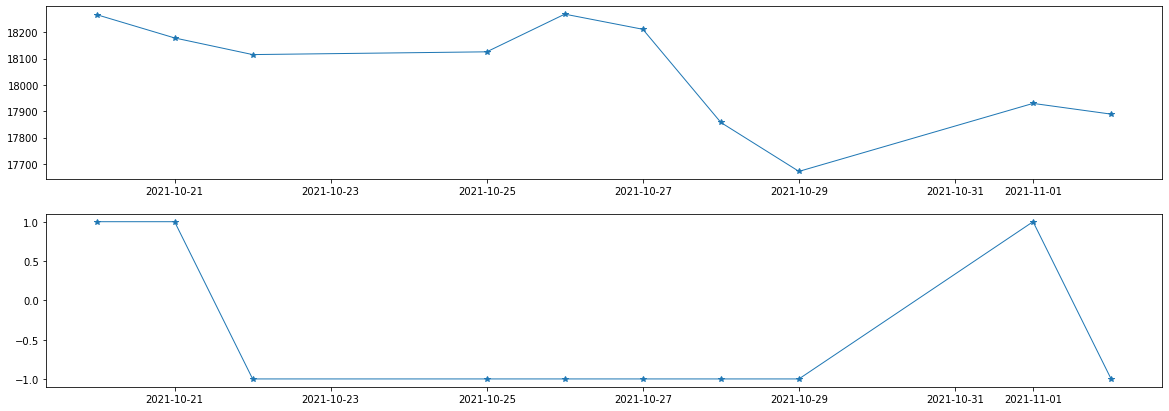

In [61]:
fig, ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(pred.index.values[-10:],pred['Close'].values[-10:],'*-',linewidth=1 )
ax[1].plot(pred.index.values[-10:],pred.pred.values[-10:],'*-',linewidth=1 );

In [62]:
pred=pred.reset_index()

In [63]:
pred['Buy_ind'] = np.where((pred['pred']==1), 1, 0)
pred['Sell_ind'] = np.where((pred['pred']==-1), 0, 1)

pred['50_EMA'] = pred["Close"].rolling(50).mean()

Text(0.5, 1.0, 'AD Nifty price with buy and sell signal ')

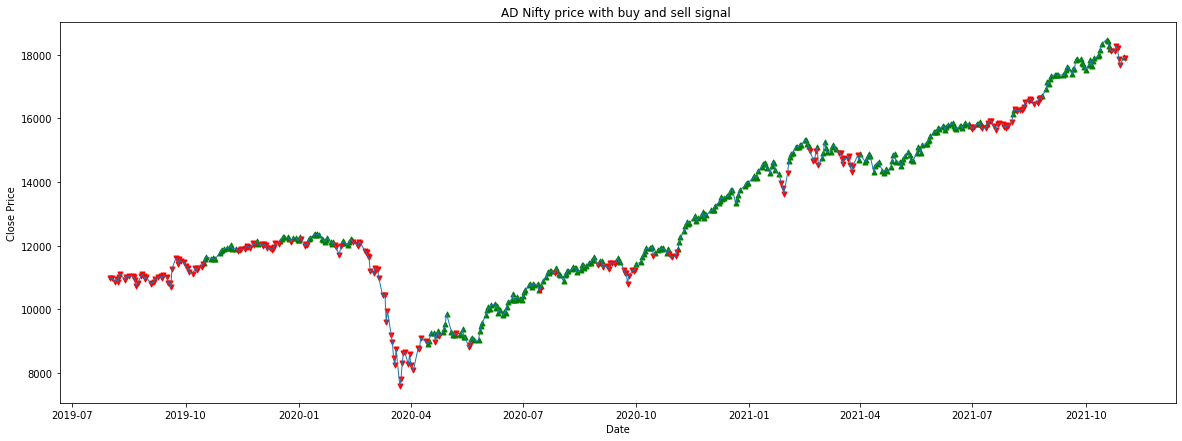

In [64]:
plt.figure(figsize=(20,7))
## plotting the buy and sell signals on graph
plt.plot(nifty_n.index.values[-l:],nifty_n['Close'].values[-l:],'-',linewidth=1)
plt.scatter(pred.loc[pred['Buy_ind'] ==1 , 'Date'].values,pred.loc[pred['Buy_ind'] ==1, 'Close'].values, label='skitscat', color='green', s=25, marker="^")
plt.scatter(pred.loc[pred['Sell_ind'] ==0 , 'Date'].values,pred.loc[pred['Sell_ind'] ==0, 'Close'].values, label='skitscat', color='red', s=25, marker="v")
#plt.plot(nifty_n.index.values[-l:],nifty_n['50_EMA'].values[-l:])
## Adding labels
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('AD Nifty price with buy and sell signal ' )

In [65]:
pred[['Date','pred','Close']].to_csv('adv_dec.csv')

In [66]:
pred.tail(1)

,Date,pred,Close,Buy_ind,Sell_ind,50_EMA
555,2021-11-02,-1.0,17888.949219,0,0,17621.298984


In [67]:
df['advances'] = df['diff']

In [68]:
df['declines']= len(nifty100)-df['advances']

In [69]:
#mc-clellan oscillator 
# ratio adjusted advances=(advances - declines)/(advances+declines)
df['advances_ratio'] = (df['advances'] - df['declines'])/(df['advances']+df['declines'])

In [70]:
df['ema19'] = df['advances_ratio'].ewm(span=19).mean()
df['ema39'] = df['advances_ratio'].ewm(span=39).mean()

In [71]:
'''
McClellan Oscillator: 19-day EMA of RANA - 39-day EMA of RANA

19-day EMA* = (Current Day RANA - Prior Day EMA) * .10 + Prior Day EMA)
39-day EMA* = (Current Day RANA - Prior Day EMA) * .05 + Prior Day EMA)
'''

df['mcclellan19'] = (df['advances_ratio']-df['ema19'].shift(1))*0.1+df['ema19'].shift(1)

In [72]:
df['mcclellan39'] = (df['advances_ratio']-df['ema39'].shift(1))*0.05+df['ema39'].shift(1)

In [73]:
df['mcclellan']=df['mcclellan19']-df['mcclellan39']

In [74]:
df['mc_summation']=df['mcclellan'].cumsum()

In [75]:
'''
MCSI=PDMCSI+CDMCO
where:
MCSI=McClellan Summation Index
PDMCSI=Previous Day’s McClellan Summation Index,
equal to the t = 0 (initial value) MCSI value for that
specific period’s McClellan Oscillator
CDMCO=Current Day’s McClellan Oscillator
​'''
df['msci']=df['mcclellan']+df['mc_summation'].shift(1)

# Mc-Clellan Oscillator For Nifty

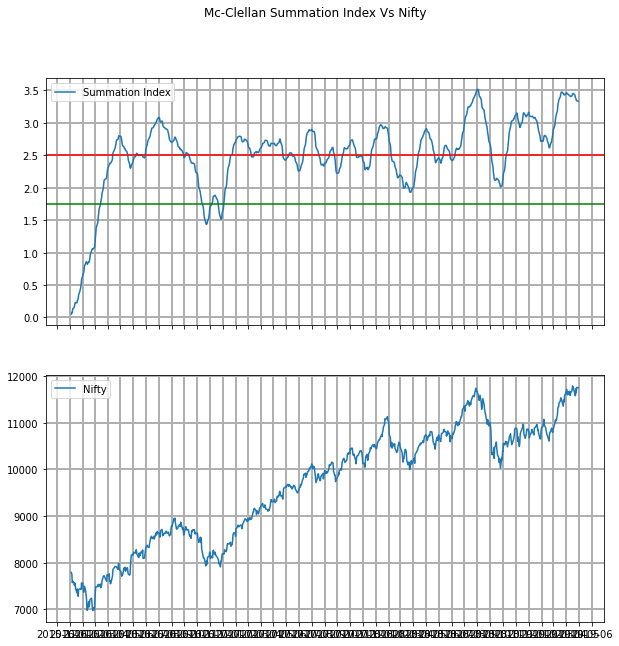

In [76]:
plt.rcParams["figure.figsize"] = (10,10)
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].plot(df.loc[:,:].index,df.loc[:,'msci'],label='Summation Index')
ax[1].plot(nifty.loc[:,:].index,nifty.loc[:,'Close'],label='Nifty')
ax[0].axhline(y=2.5,color='r')
ax[0].axhline(y=1.75,color='g')
plt.suptitle('Mc-Clellan Summation Index Vs Nifty')
yloc = YearLocator()
mloc = MonthLocator()
ax[0].xaxis.set_major_locator(mloc)
ax[1].xaxis.set_major_locator(mloc)
ax[0].legend()
ax[1].legend()
ax[0].grid(linewidth =2)
ax[1].grid(linewidth =2)


plt.show()